## Assignment 1: Fundamentals of Quantum Engineering 3705

#### By Rahul Hosakere Ravishankara z5419267

In [1]:
# Import the required python packages
import numpy as np
import cmath, math
from numpy import linalg as lin
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.linalg import expm
import imageio  as iio

### Section 1.1:

In [225]:
img = iio.imread("image_3705.jpg") #import image and convert into a matrix of rows and columns
n = len(img) #length = size of matrix
np.shape(img) 
cols = n
c = np.linspace(-cols/2, cols/2,cols)
rows = img.shape[1]
r = np.linspace(-rows/2, rows/2, rows)

np.shape(img) 

/var/folders/86/cmmxgn3j65905rz90r57pqnc0000gn/T/ipykernel_30254/624445916.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("image_3705.jpg") #import image and convert into a matrix of rows and columns


(128, 128)

### Section 1.2: 

In [3]:
#Finding Gaussian Distribution
std = 5 #standard deviation
gamma_n = 42.48e6
mu_c = 64 #mu for centre of image
mu_20off = 84 #mu for 20 offset centre
pi = np.pi
G_c = np.zeros(n)
G_20 = np.zeros(n)
for i in range(n): 
    G_c[i] = 1/(std*np.sqrt(2*pi))*np.exp(-((i-mu_c)**2)/(2*(std**2))) #Gaussian distribution for centre
    G_20[i] = 1/(std*np.sqrt(2*pi))*np.exp(-((i-mu_20off)**2)/(2*(std**2))) #Gaussian distribution for 20 offset 

In [4]:
#Finding Bz and Ez
Max_c = G_c.max() #finding Max value of G_c
Max_20 = G_20.max() #max value of G_20
Bz_c = np.zeros(n, dtype = float)
Ez_c = np.zeros(n, dtype = float)
Bz_20 = np.zeros(n, dtype = float)
Ez_20 = np.zeros(n, dtype = float)

for i in range (0,n):
    Bz_c[i] = 0.5*(2-(G_c[i]/Max_c)) #finding magnetic field in z direction for centre
    Ez_c[i] = gamma_n*Bz_c[i] #finding zeeman energy
    Bz_20[i] = 0.5*(2-(G_20[i]/Max_20)) #finding magnetic field in z direction for 20 offset
    Ez_20[i] = gamma_n*Bz_20[i] #finding zeeman energy
    

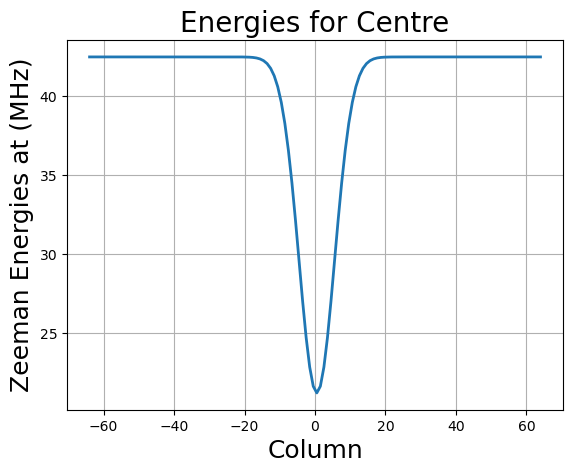

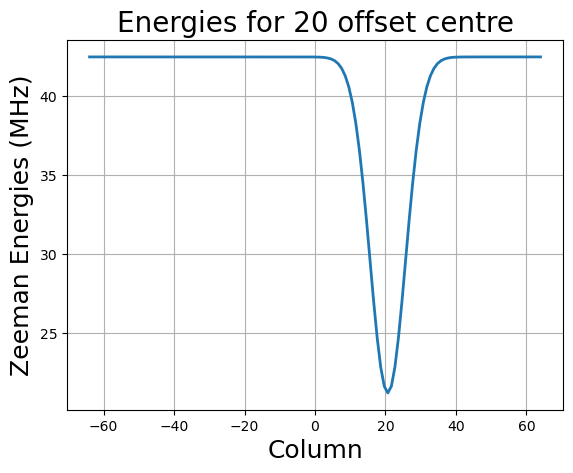

In [5]:
#Plotting Zeeman Energies for B centered around middle 
x_axis = np.linspace(-n/2, n/2,n) #creating x-axis
plt.figure(1)
plt.plot(x_axis, Ez_c/1e6 ,linewidth = 2)
plt.title('Energies for Centre', fontsize = 20)
plt.ylabel('Zeeman Energies at (MHz)', fontsize = 18)   
plt.xlabel('Column', fontsize = 18)
plt.grid(True)

#Plotting Zeeman Energies for B centered around 20 offset
plt.figure(2)
plt.plot(x_axis, Ez_20/1e6, linewidth = 2)
plt.title('Energies for 20 offset centre', fontsize = 20)
plt.ylabel('Zeeman Energies (MHz)', fontsize = 18)   
plt.xlabel('Column', fontsize = 18)
plt.grid(True)

### Section 1.3:

In [6]:
#Finding Hamiltonians 

#Nuclear Spin Matricies 
Ix = 0.5*np.array([[0,1],[1,0]]) 
Iy = 0.5*np.array([[0,1j],[-1j,0]])
Iz = 0.5*np.array([[1,0],[0,-1]], dtype = complex)

gamma_n = 42.48e6 #Gyromagnetic ratio
Hi = np.zeros((rows, cols, 2, 2), dtype = complex)

#Calculating Hamiltonian 
for k in range(n):
    H = gamma_n*Bz_c[k]*Iz;
    Hi[k] = H
    
print('The Hamiltonian for centre pixel is:')
print(Hi[64,64])
      
print('The Hamiltonian for last pixel is:')
print(Hi[127,127])



The Hamiltonian for centre pixel is:
[[ 10620000.+0.j         0.+0.j]
 [        0.+0.j -10620000.+0.j]]
The Hamiltonian for last pixel is:
[[ 21240000.+0.j         0.+0.j]
 [        0.+0.j -21240000.+0.j]]


### Section 1.4: 

In [228]:
freq_res = (gamma_n*Bz_c[64])/(2*pi) #Larmour frequency 
print('Bx should oscillate at:', freq_res/1e6, 'MHz')
t = 0
h_bar = 1.05457182e-34
rows = n
cols = n

#Function to define Bx
def Bx(t):
    return 10e-3*np.cos(2*pi*freq_res*t)

#Function to calculate rotational Hamiltonian 
def Hrot(row, col, f, t):
    freq_delta = f-(gamma_n*Bz_c[col+64])/(2*pi)
    freq0 = gamma_n*Bx(t)/(2*pi)
    return 2*pi*h_bar/2*np.array([[-freq_delta, freq0], [freq0, freq_delta]], dtype = complex)

H_rot = np.zeros((rows, cols, 2, 2), dtype = complex)

#Calculates rotational hamiltonian & saves it in H_rot
for r in range(-rows//2, rows//2):
    for c in range(-cols//2, cols//2):
        Hr = Hrot(r, c, freq_res, 0)
        arr_r = r + rows//2
        arr_c = c+cols//2
        H_rot[arr_r, arr_c] = Hr
        
print('Rotational Hamiltonian at middle pixel is:')
print(H_rot[64,64])

print('Rotational Hamiltonian at last pixel is:')
print(H_rot[127,127])


Bx should oscillate at: 3.380450991271857 MHz
Rotational Hamiltonian at middle pixel is:
[[-0.00000000e+00+0.j  2.23991055e-29+0.j]
 [ 2.23991055e-29+0.j  0.00000000e+00+0.j]]
Rotational Hamiltonian at last pixel is:
[[ 1.11995527e-27+0.j  2.23991055e-29+0.j]
 [ 2.23991055e-29+0.j -1.11995527e-27+0.j]]


### Section 1.5

/Users/rahulhosakere/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


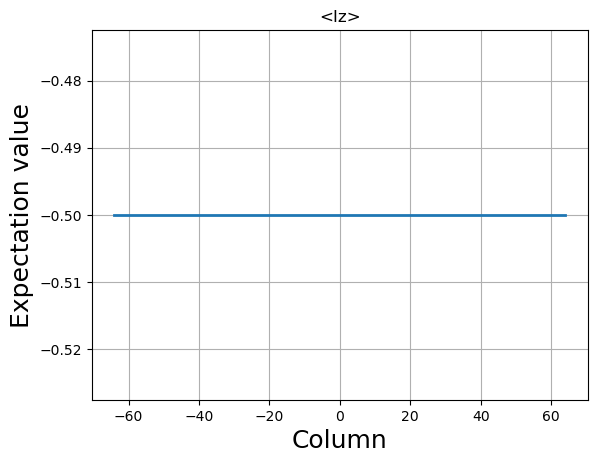

In [8]:
#Function to calculate expectation value 
psi0 = np.array([[0], [1]])
def expec_val(row, col, t, I_k):
    curr_H = Hi[row, col]
    ket = expm((-1j*curr_H*t)/(h_bar)) @ psi0
    bra = np.conj(ket.T)
    expec = bra @ I_k @ ket 
    return expec 

expec_val_z = np.zeros(n, dtype = complex)

#calculate <Iz>
for col in range (cols): 
    expec_val_z[col] = expec_val(1, col, 0, Iz)
    
#columns axis
c = np.linspace(-cols/2, cols/2, cols)

#plot <Iz> against columns
plt.plot(c,expec_val_z, linewidth = 2)
plt.title('<Iz>')
plt.ylabel('Expectation value', fontsize = 18) 
plt.xlabel('Column', fontsize = 18)
plt.grid()

### Section 1.6: 

In [232]:
B_amp = 10e-3 #amplitude of Bx 
omega1 = gamma_n*B_amp 
f1 = omega1/(2*pi)
TRabi = 1/f1 #Period of rabi oscillation
tmax = 2*TRabi
time_step = TRabi/50
#tmax/time_step = 100
pts = 100;
down = np.array([[0],[1]])
psi0 = down #initial state 
time = np.linspace(0,tmax,pts) #axes for plotting time

print('The Rabi Period is:', TRabi/1e-6, 'us')


The Rabi Period is: 14.790925864358726 us


In [10]:
#Function to calculate expectation value 
def expec_val(row, col, t, I_k):
    curr_H = H_rot[row, col]
    ket = expm((-1j*curr_H*t)/(h_bar)) @ psi0
    bra = np.conj(ket.T)
    expec = bra @ I_k @ ket 
    return expec 

In [11]:
#Expectation value for Centre Pixel (index 64) 
expec_val_x_c = np.zeros(pts, dtype = complex)
expec_val_y_c = np.zeros(pts, dtype = complex)
expec_val_z_c = np.zeros(pts, dtype = complex)

for t1 in range(pts):
    expec_val_x_c[t1] = expec_val(64,64, time[t1], Ix)
    expec_val_y_c[t1] = expec_val(64,64, time[t1], Iy) 
    expec_val_z_c[t1] = expec_val(64,64, time[t1], Iz)

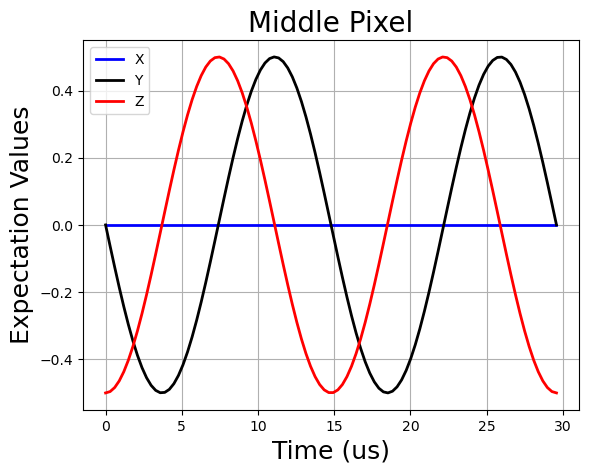

In [12]:
#Plot expectation value for centre pixel 
plt.figure(1)
plt.plot(time/1e-6, expec_val_x_c, label='X', color='blue', linewidth = 2)
plt.plot(time/1e-6, expec_val_y_c, label='Y', color='black', linewidth = 2)
plt.plot(time/1e-6, expec_val_z_c, label='Z', color='red', linewidth = 2)
plt.title('Middle Pixel', fontsize = 20)
plt.xlabel('Time (us)', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.legend()

In [13]:
#Expectation value for pixel offset 1 from center (index 65)
expec_val_x_off1 = np.zeros(pts, dtype = complex)
expec_val_y_off1 = np.zeros(pts, dtype = complex)
expec_val_z_off1 = np.zeros(pts, dtype = complex)

for t2 in range(pts):
    expec_val_x_off1[t2] = expec_val(65, 65, time[t2], Ix)
    expec_val_y_off1[t2] = expec_val(65, 65, time[t2], Iy) 
    expec_val_z_off1[t2] = expec_val(65, 65, time[t2], Iz)   

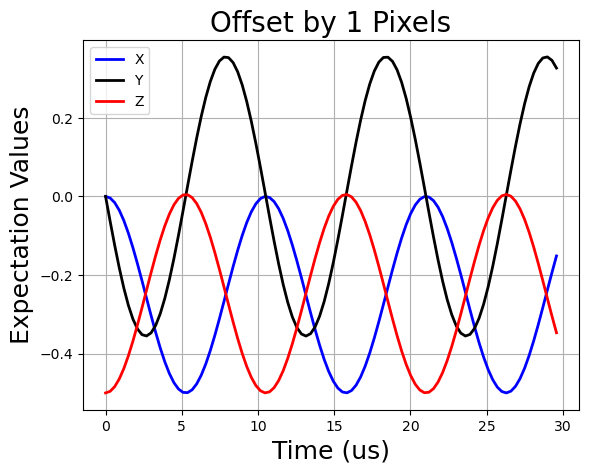

In [14]:
#Plot pixel offset by 1 from the middle 
plt.figure(2)
plt.plot(time/(1e-6), expec_val_x_off1, label='X', color='blue', linewidth = 2)
plt.plot(time/(1e-6), expec_val_y_off1, label='Y', color='black', linewidth = 2)
plt.plot(time/(1e-6), expec_val_z_off1, label='Z', color='red', linewidth = 2)
plt.title('Offset by 1 Pixels', fontsize = 20)
plt.xlabel('Time (us)', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid()
plt.legend()

In [15]:
#Expectation value for pixel offset 2 from center (index 66)
expec_val_x_off2 = np.zeros(pts, dtype = complex)
expec_val_y_off2 = np.zeros(pts, dtype = complex)
expec_val_z_off2 = np.zeros(pts, dtype = complex)

for t3 in range(pts):
    expec_val_x_off2[t3] = expec_val(66, 66, time[t3], Ix)
    expec_val_y_off2[t3] = expec_val(66, 66, time[t3], Iy) 
    expec_val_z_off2[t3] = expec_val(66, 66, time[t3], Iz)


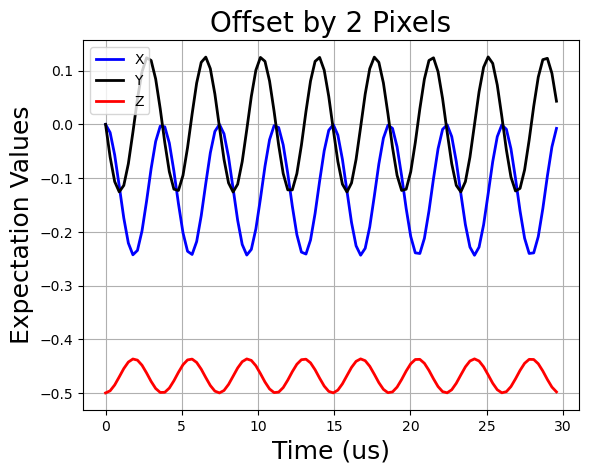

In [16]:
# Plot for the pixel offset by 2 from the center
plt.figure(3)
plt.plot(time/(1e-6), expec_val_x_off2, label='X', color='blue', linewidth = 2)
plt.plot(time/(1e-6), expec_val_y_off2, label='Y', color='black', linewidth = 2)
plt.plot(time/(1e-6), expec_val_z_off2, label='Z', color='red', linewidth = 2)
plt.title('Offset by 2 Pixels', fontsize = 20)
plt.xlabel('Time (us)', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.legend()

In [17]:
#Expectation value for last pixel (index 127)
expec_val_x_l = np.zeros(pts, dtype = complex)
expec_val_y_l = np.zeros(pts, dtype = complex)
expec_val_z_l = np.zeros(pts, dtype = complex)

for t4 in range(pts):
    expec_val_x_l[t4] = expec_val(127, 127, time[t4], Ix)
    expec_val_y_l[t4] = expec_val(127, 127, time[t4], Iy) 
    expec_val_z_l[t4] = expec_val(127,127,  time[t4], Iz)

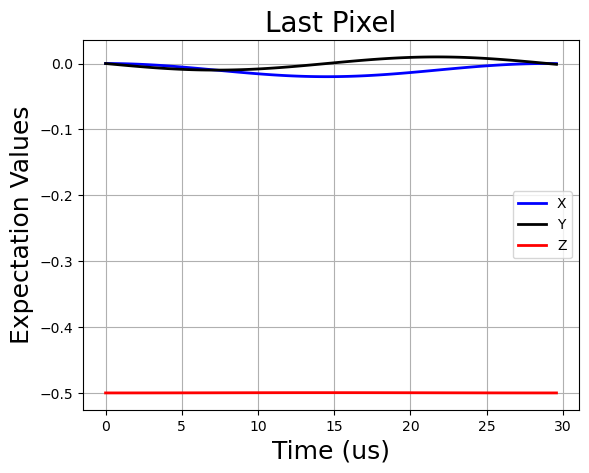

In [18]:
# Plot for the last pixel
plt.figure(4)

plt.plot(time/1e-6, expec_val_x_l, label='X', color='blue', linewidth = 2)
plt.plot(time/1e-6, expec_val_y_l, label='Y', color='black', linewidth = 2)
plt.plot(time/1e-6, expec_val_z_l, label='Z', color='red', linewidth = 2)
plt.title('Last Pixel', fontsize = 20)
plt.xlabel('Time (us)', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.legend()

### Section 1.7:

In [19]:
TRabi_pulse = TRabi/4 #pi/2 rotation means 1/4 period
print('The Pi/2 pulse duration is:')
print(TRabi_pulse/1e-6, 'us')

The Pi/2 pulse duration is:
3.6977314660896816 us


In [20]:
#Unitary operator on psi_0
def operator(col, psi0):
    ket = expm(-1j*H_rot[0, col]*TRabi_pulse/(h_bar)) @ psi0
    return ket

#Function to calculate expectation value 
def expec_val_pulse(col,t):
    ket = operator(col, psi0)
    bra = np.conj(ket.T)
    
    expec_pulse_x = bra @ Ix @ ket 
    expec_pulse_y = bra @ Iy @ ket 
    expec_pulse_z = bra @ Iz @ ket 
    
    return expec_pulse_x, expec_pulse_y, expec_pulse_z

Exp = np.zeros((n, 3), dtype=complex)

for col in range(n):
    expec_pulse_x, expec_pulse_y, expec_pulse_z = expec_val_pulse(col, t)
    Exp[col, 0] = expec_pulse_x
    Exp[col, 1] = expec_pulse_y
    Exp[col, 2] = expec_pulse_z+0.5

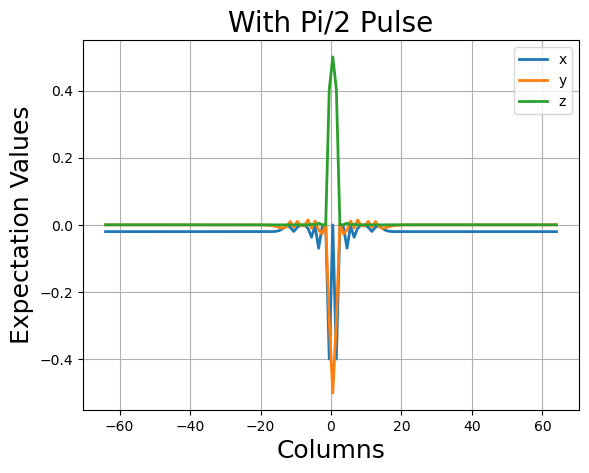

In [21]:
plt.figure(1)
plt.title('With Pi/2 Pulse', fontsize = 20)
plt.xlabel('Columns', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.plot(c, Exp[:,0], label = 'x', linewidth = 2)
plt.plot(c, Exp[:,1], label = 'y', linewidth = 2)
plt.plot(c, Exp[:,2], label = 'z', linewidth = 2)
plt.legend()


### Section 1.8

In [182]:
TLarmour = 1/freq_res #period of Larmour Precession
tmax_L = 2*TLarmour 
time_step = TLarmour/50
#intervals = tmax_l/time_step i.e. same as 1.6
tm = np.linspace(0,tmax_L, pts) #axes to plot against 

#matrix to transform rotational hamiltonian to lab frame 
rotation = np.array([[np.exp(-1j*2*pi*freq_res*TRabi_pulse), 0],[0, np.exp(-1j*2*pi*freq_res*TRabi_pulse)]])

psi = np.zeros((2, n, len(tm)), dtype = complex)

#fills 2nd col of psi with lab frame psi0
for j in range(n):
    psi[:,j,0] = rotation @ operator(col,psi0)[:,0]
    
#calculate time evolution for lab frame    
for r in range(1, len(tm)):
    for c in range(n):
        H_curr = gamma_n*Bz_c[c]*Iz
        Udt = expm(-1j*H_curr*time_step/h_bar)
        psi[:,c, r] = Udt @ psi[:,c,r-1]
        

In [23]:
#Expectation value in Lab for middle pixel (index 64)

expec_lab_x_c = np.zeros(pts, dtype = complex)
expec_lab_y_c = np.zeros(pts, dtype = complex)
expec_lab_z_c = np.zeros(pts, dtype = complex)

for l1 in range(len(tm)):
    expec_lab_x_c[l1] = np.real(np.conj(psi[:,64, l1].T) @ (Ix) @ (psi[:,64, l1]))
    expec_lab_y_c[l1] = np.real(np.conj(psi[:,64, l1].T) @ (Iy) @ (psi[:,64, l1]))
    expec_lab_z_c[l1] = np.real(np.conj(psi[:,64, l1].T) @ (Iz) @ (psi[:,64, l1]))+0.5

In [24]:
#Expectation value in Lab for pixel offset 1 from centre (index 65)

expec_lab_x_off1 = np.zeros(pts, dtype = complex)
expec_lab_y_off1 = np.zeros(pts, dtype = complex)
expec_lab_z_off1 = np.zeros(pts, dtype = complex)

for l2 in range(len(tm)):
    expec_lab_x_off1[l2] = np.real(np.conj(psi[:,65, l2].T) @ (Ix) @ (psi[:,65, l2]))
    expec_lab_y_off1[l2] = np.real(np.conj(psi[:,65, l2].T) @ (Iy) @ (psi[:,65, l2]))
    expec_lab_z_off1[l2] = np.real(np.conj(psi[:,65, l2].T) @ (Iz) @ (psi[:,65, l2]))+0.5

In [25]:
#Expectation value in Lab for last pixel (index 127)

expec_lab_x_l = np.zeros(pts, dtype = complex)
expec_lab_y_l = np.zeros(pts, dtype = complex)
expec_lab_z_l = np.zeros(pts, dtype = complex)

for l3 in range(len(tm)):
    expec_lab_x_l[l3] = np.real(np.conj(psi[:,127, l3].T) @ (Ix) @ (psi[:,127, l3]))
    expec_lab_y_l[l3] = np.real(np.conj(psi[:,127, l3].T) @ (Iy) @ (psi[:,127, l3]))
    expec_lab_z_l[l3] = np.real(np.conj(psi[:,127, l3].T) @ (Iz) @ (psi[:,127, l3]))+0.5

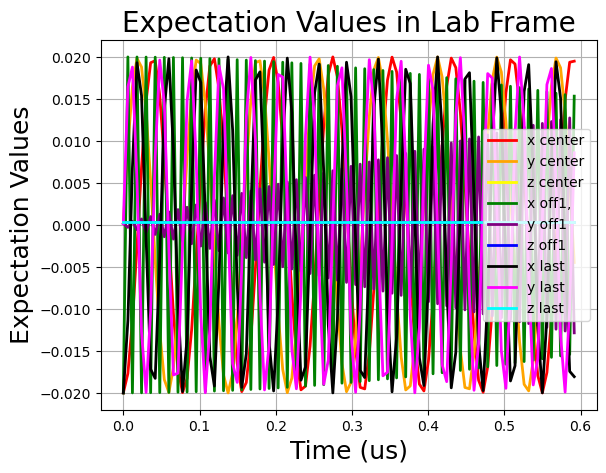

In [26]:
#Plot all expec values for all pixels 

plt.figure(1)
plt.title('Expectation Values in Lab Frame', fontsize = 20)
plt.xlabel('Time (us)', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18)
plt.grid(True)
plt.plot(tm/1e-6, expec_lab_x_c, label = 'x center', color = 'red', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_y_c, label = 'y center', color = 'orange', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_z_c, label = 'z center', color = 'yellow', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_x_off1, label = 'x off1,', color = 'green', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_y_off1, label = 'y off1', color = 'purple', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_z_off1, label = 'z off1', color = 'blue', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_x_l, label = 'x last', color = 'black', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_y_l, label = 'y last', color = 'magenta', linewidth = 2)
plt.plot(tm/1e-6, expec_lab_z_l, label = 'z last', color = 'cyan', linewidth = 2)
plt.legend()

### Section 1.9: 

In [190]:
up = np.array([[1], [0]]) #initial state
psi_t1 = np.zeros((2, n), dtype = complex)
psi_t1[:,0] = operator(col, up)[:,0] #initial state into psi_t1

#Values of psi from 1.8 into psi_t1
for i in range(len(tm)): 
    psi_t1[:,i] =  psi[:,0,i]


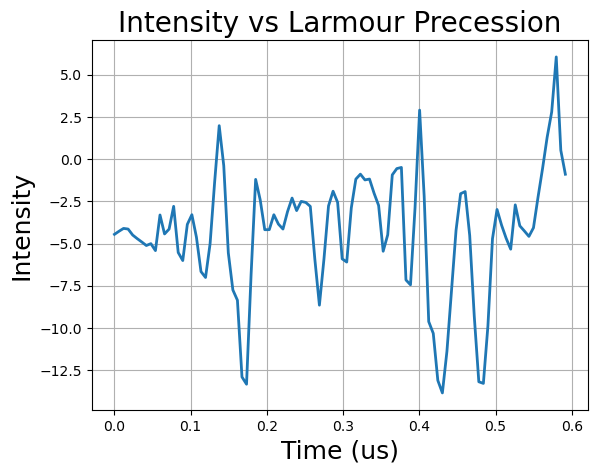

In [196]:
expec_x_larm = np.zeros((n, len(tm)), dtype = complex)
intensity = np.zeros((len(tm), len(tm)), dtype = complex)
#calculate expectation value
for j in range(0, len(tm)):
    ket = psi_t1[:,j]
    bra = np.conj(ket.T)
    expec_x_larm[j] = bra @ Ix @ ket
    
#calculate intensity
for r in range(len(tm)):
    for c in range(len(tm)):
        intensity[r] = img[r,c] * expec_x_larm[c] + intensity[r]
        
#plot intensity vs larmour prcession
plt.figure(1)
plt.title('Intensity vs Larmour Precession', fontsize = 20)
plt.grid(True)
plt.xlabel('Time (us)', fontsize = 18)
plt.ylabel('Intensity', fontsize = 18)
plt.plot(tm/1e-6, intensity[:,0], linewidth = 2)

### Section 1.10

In [223]:
psi_t2 = np.zeros((2, n), dtype = complex)

#fill psi_t2 with intial state
for j in range(n):
    psi_t2[:,j] = rotation @ operator(j,up)[:,0]
    
#calculate time evolution for 3/4 TLarmour   
for r in range(1, n):
    for c in range(1,n):
        H_curr = gamma_n*Bz_c[c]*Iz
        Udt = expm(-1j*H_curr*(3*TLarmour/4)/h_bar)
        psi_t2[:,c] = Udt @ psi_t2[:,c-1]


The intensity for the first row is: (-6.748717674117259+0j)


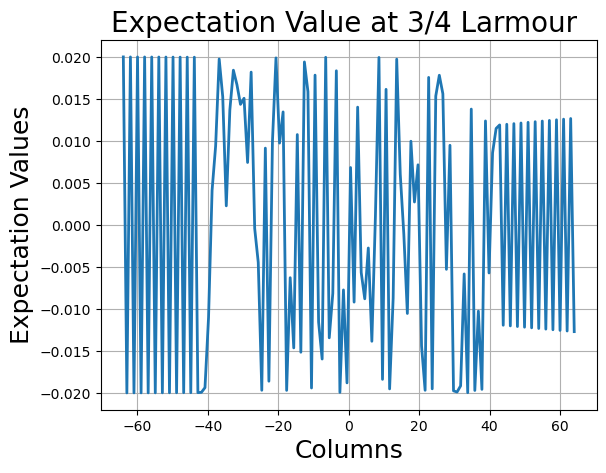

In [234]:
x_larm = np.zeros(n, dtype = complex)
intensity_2 = np.zeros((len(tm), len(tm)), dtype = complex)

#calculate expectation value
for j in range(n):
    ket = psi_t2[:,j]
    bra = np.conj(ket.T)
    x_larm[j] = bra @ Ix @ ket
    
c = np.linspace(-cols/2, cols/2,cols)

#plot expectation vs columns
plt.figure(1)
plt.title('Expectation Value at 3/4 Larmour ', fontsize = 20)
plt.grid(True)
plt.xlabel('Columns', fontsize = 18)
plt.ylabel('Expectation Values', fontsize = 18) 
plt.plot(c, x_larm, linewidth = 2)

#calculate intensity for first row 
for r in range(len(tm)):
    for c in range(len(tm)):
        intensity_2[r] = img[r,c] * expec_x_larm[c] + intensity[r]
        
print('The intensity for the first row is:', intensity_2[0,0])